## import

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image  # 用於載入圖片
from random import randrange
import pandas as pd
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

## Data preprocess

In [14]:
csv_path = r"C:\Users\n9613\OneDrive\Desktop\cifar-10\trainLabels.csv"
data = pd.read_csv(csv_path)

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0  # 標準化
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print(r'x_train.shape = ', x_train.shape)
print(r'y_train.shape = ', y_train.shape)
print(r'x_test.shape = ', x_test.shape)
print(r'y_test.shape = ', y_test.shape)

x_train.shape =  (50000, 32, 32, 3)
y_train.shape =  (50000, 10)
x_test.shape =  (10000, 32, 32, 3)
y_test.shape =  (10000, 10)


<Figure size 1600x1000 with 0 Axes>

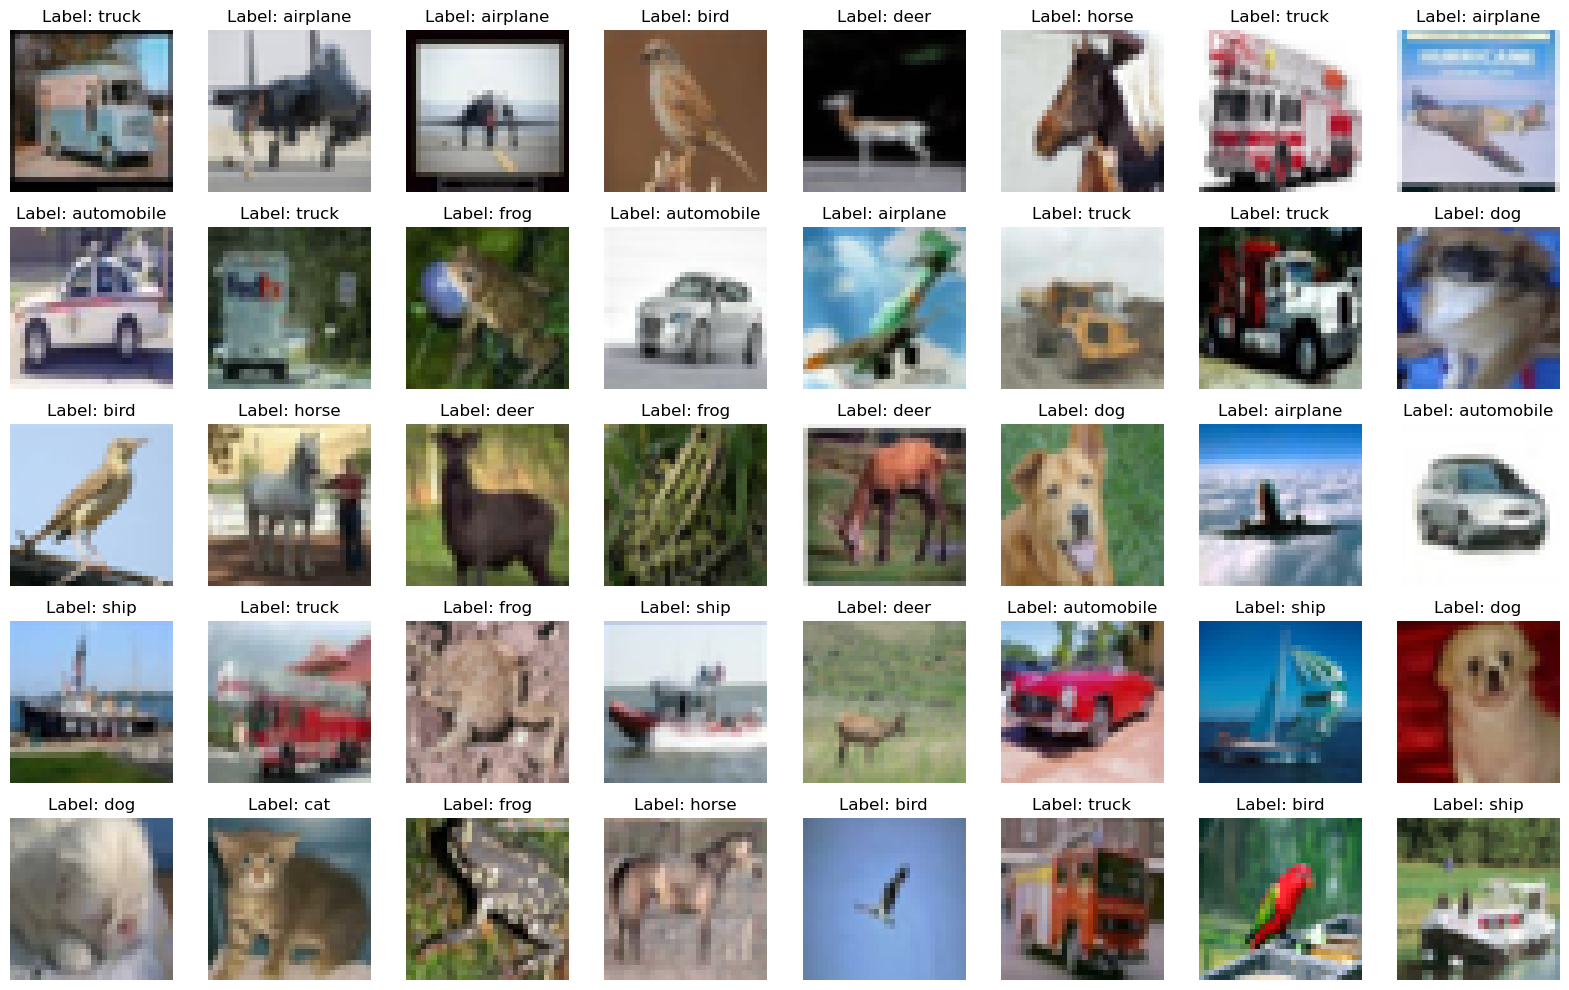

In [ ]:
# plt.figure(figsize=(16, 10), facecolor='white')

# if len(y_train.shape) > 1:
#     y_train = np.argmax(y_train, axis=1)

# plt.figure(figsize=(16, 10), facecolor='white')
# for i in range(5):  
#     for j in range(8):  
#         index = randrange(len(x_train))  
#         plt.subplot(5, 8, i * 8 + j + 1)  
#         plt.imshow(x_train[index])  
#         plt.title(f"Label: {class_names[int(y_train[index])]}") 
#         plt.axis('off')  

# plt.tight_layout()
# plt.show()

## Build Model & Compare

Training Model 1...
Epoch 1/20
782/782 - 6s - 8ms/step - accuracy: 0.2865 - loss: 1.9447 - val_accuracy: 0.3055 - val_loss: 1.9180
Epoch 2/20
782/782 - 5s - 6ms/step - accuracy: 0.3412 - loss: 1.8059 - val_accuracy: 0.3338 - val_loss: 1.8289
Epoch 3/20
782/782 - 5s - 6ms/step - accuracy: 0.3625 - loss: 1.7617 - val_accuracy: 0.3621 - val_loss: 1.7568
Epoch 4/20
782/782 - 5s - 6ms/step - accuracy: 0.3682 - loss: 1.7485 - val_accuracy: 0.3628 - val_loss: 1.7486
Epoch 5/20
782/782 - 5s - 6ms/step - accuracy: 0.3818 - loss: 1.7072 - val_accuracy: 0.3699 - val_loss: 1.7488
Epoch 6/20
782/782 - 5s - 6ms/step - accuracy: 0.3907 - loss: 1.6916 - val_accuracy: 0.3865 - val_loss: 1.7183
Epoch 7/20
782/782 - 5s - 6ms/step - accuracy: 0.3996 - loss: 1.6715 - val_accuracy: 0.3822 - val_loss: 1.7188
Epoch 8/20
782/782 - 5s - 6ms/step - accuracy: 0.4010 - loss: 1.6658 - val_accuracy: 0.3883 - val_loss: 1.7208
Epoch 9/20
782/782 - 5s - 6ms/step - accuracy: 0.4029 - loss: 1.6578 - val_accuracy: 0.3876 

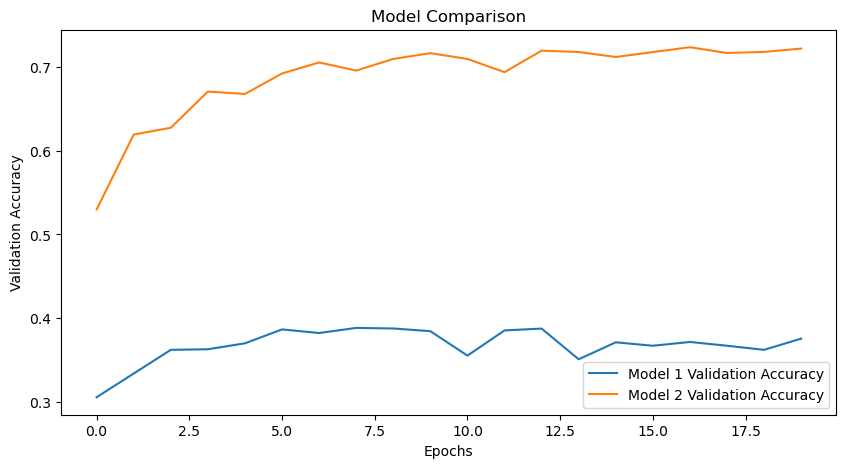

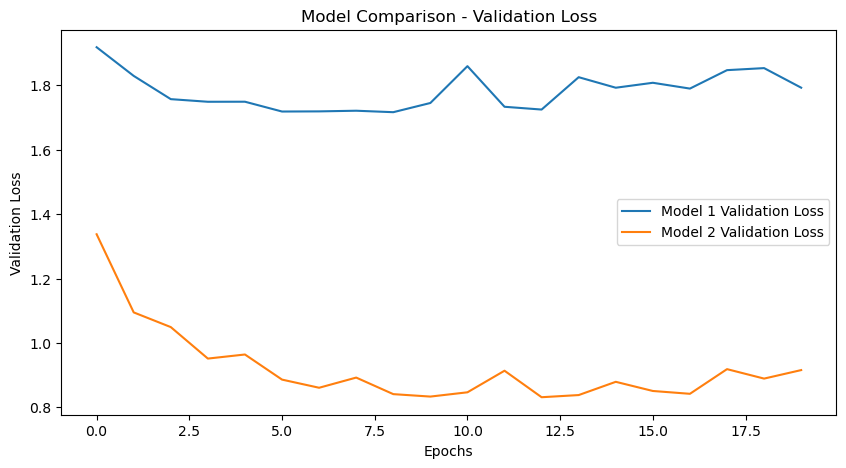

In [26]:
def build_model1():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    optimizer=Adam(learning_rate=0.01)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    # model.summary()
    return model

def build_model2():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    optimizer=Adam(learning_rate=0.01)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    # model.summary()
    return model

# 訓練並比較模型
history = {}
models = {"Model 1": build_model1(), "Model 2": build_model2()}

for name, model in models.items():
    print(f"Training {name}...")
    history[name] = model.fit(
        x_train, y_train,
        epochs=20,
        batch_size=64,
        validation_data=(x_test, y_test),
        verbose=2
    )

# 繪製比較結果
plt.figure(figsize=(10, 5))

for name in models.keys():
    plt.plot(history[name].history['val_accuracy'], label=f'{name} Validation Accuracy')

plt.title('Model Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
for name in models.keys():
    plt.plot(history[name].history['val_loss'], label=f'{name} Validation Loss')

plt.title('Model Comparison - Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

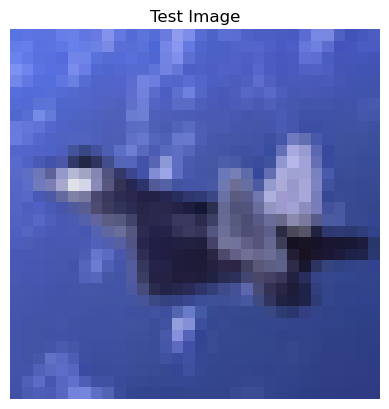

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Model 1 Predicted class: truck
Model 2 Predicted class: frog
Actual Label: airplane


In [74]:
# image_path = r"C:\Users\n9613\OneDrive\Desktop\cifar-10\train\6063.png"  
image = Image.open(image_path).resize((32, 32)) 
plt.imshow(image)
plt.title("Test Image")
plt.axis('off')
plt.show()

image_array = np.array(image) / 255.0  # 標準化
image_array = np.expand_dims(image_array, axis=0)  

model = build_model1() 
predictions = model.predict(image_array)
predicted_class = np.argmax(predictions)

model2 = build_model2() 
predictions2 = model2.predict(image_array)
predicted_class2 = np.argmax(predictions2)

print(f"Model 1 Predicted class: {class_names[predicted_class]}")
# print(f"Prediction confidence: {predictions[0][predicted_class]:.2f}")

print(f"Model 2 Predicted class: {class_names[predicted_class2]}")
# print(f"Prediction confidence: {predictions2[0][predicted_class2]:.2f}")

print(f"Actual Label: {data["label"][6063-1]}")


## VGG16

Model: "functional_107"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_107 (InputLayer)    │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_107 (Flatten)           │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_214 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_58 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_215 (Dense)               │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 65ms/step - accuracy: 0.3978 - loss: 1.7017 - val_accuracy: 0.5511 - val_loss: 1.2867
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 62ms/step - accuracy: 0.5361 - loss: 1.3241 - val_accuracy: 0.5744 - val_loss: 1.2220
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - accuracy: 0.5656 - loss: 1.2396 - val_accuracy: 0.5793 - val_loss: 1.1925
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step - accuracy: 0.5768 - loss: 1.2045 - val_accuracy: 0.5913 - val_loss: 1.1625
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.5882 - loss: 1.1792 - val_accuracy: 0.5937 - val_loss: 1.1597
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.5966 - loss: 1.1565 - val_accuracy: 0.5989 - val_loss: 1.1425
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.6028 - loss: 1.1413 - val_accuracy: 0.6033 - val_loss: 1.1286
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step - accuracy: 0.6050 - loss: 1.1167 - 

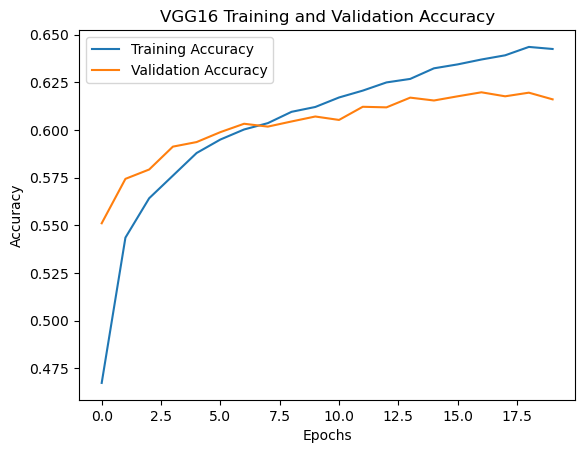

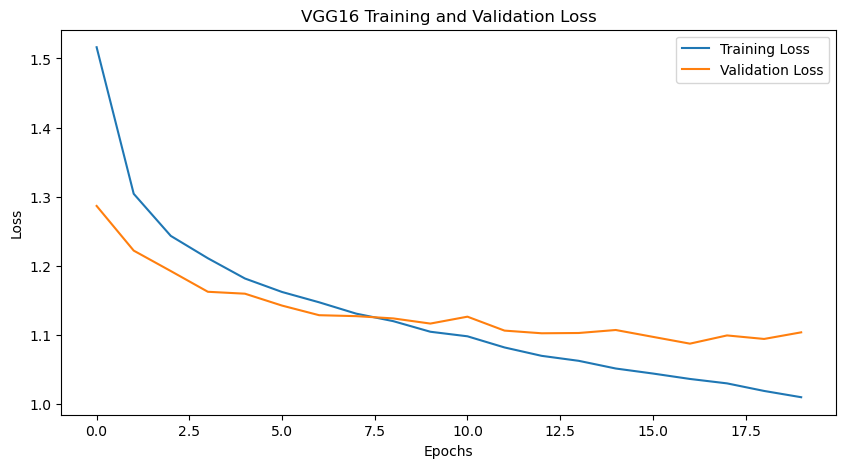

In [67]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

base_model.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)  

model= Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.2f}")


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG16 Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('VGG16 Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

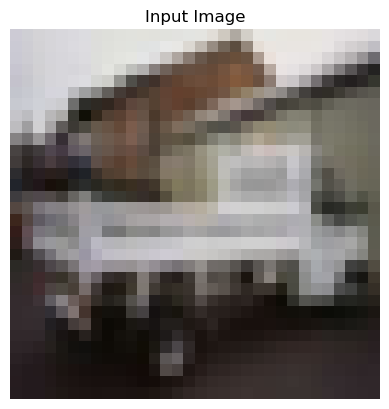

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Class: truck
Actual Label: deer


In [99]:
# image_path = r"C:\Users\n9613\OneDrive\Desktop\cifar-10\test\4.png" 
image_path = r"C:\Users\n9613\OneDrive\Desktop\cifar-10\train\8839.png"  
image = Image.open(image_path).resize((32, 32))  
plt.imshow(image)
plt.title("Input Image")
plt.axis('off')
plt.show()

image_array = np.array(image) / 255.0  
image_array = np.expand_dims(image_array, axis=0)  

predictions = model.predict(image_array)
predicted_class = np.argmax(predictions)

print(f"Predicted Class: {class_names[predicted_class]}")
# print(f"Prediction Confidence: {predictions[0][predicted_class]:.2f}")
print(f"Actual Label: {data["label"][3]}")
